# Průměrný věk

In [95]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Načtení JSON s počtem obyvatel obcí
with open('data/okres_nazev_pocet.json') as f:
    kraje_pocty = json.load(f)['okres_nazev_pocet']

# Načtení JSON s počtem obyvatel obcí
with open('data/okres_nazev_geojson.json') as f:
    kraje_geojson = json.load(f)['okres_nazev_geojson']

# Nahrazení 'cesta_k_souboru.csv' cestou k vašemu CSV souboru
data = pd.read_csv('../data_original/sldb2021_prumvek_pohlavi.csv')

# Filtrujeme data pro území 'Česká republika', kde 'aktivita_txt' je 'Nezaměstnaní'
filtered_data = data[(data['uzemi_cis'] == 101) & (data['pohlavi_txt'].isnull())]

# Seskupíme data podle kraje a spočítáme součet nezaměstnaných
grouped_data = filtered_data.groupby('uzemi_txt')['hodnota'].sum()

pomer_nezamestnanych = grouped_data.sort_values(ascending=True)

# Vytiskneme poměr nezaměstnaných v každém kraji
print(pomer_nezamestnanych)

# Funkce pro generování barev
def generate_colors(data, colormap='RdYlGn_r'):
    norm = mcolors.Normalize(vmin=min(data), vmax=max(data))
    cmap = plt.get_cmap(colormap)
    colors = {kraje_geojson[uzemi]: mcolors.to_hex(cmap(norm(value))) for uzemi, value in data.items()}
    return colors

# Generování barev
colors = generate_colors(pomer_nezamestnanych)

# Vytisknutí slovníku s barvami
# print(colors)

uzemi_txt
Praha-východ    39.2
Praha-západ     39.6
Brno-venkov     41.3
Praha           41.4
Beroun          41.5
                ... 
Bruntál         44.3
Karlovy Vary    44.4
Písek           44.4
Klatovy         44.4
Jeseník         44.8
Name: hodnota, Length: 77, dtype: float64


# Nezaměstnanost

In [59]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Načtení JSON s počtem obyvatel obcí
with open('data/okres_nazev_pocet.json') as f:
    kraje_pocty = json.load(f)['okres_nazev_pocet']

# Načtení JSON s počtem obyvatel obcí
with open('data/okres_nazev_geojson.json') as f:
    kraje_geojson = json.load(f)['okres_nazev_geojson']

# Nahrazení 'cesta_k_souboru.csv' cestou k vašemu CSV souboru
data = pd.read_csv('../data_original/sldb2021_aktivita_vek5_pohlavi.csv')

# Filtrujeme data pro území 'Česká republika', kde 'aktivita_txt' je 'Nezaměstnaní'
filtered_data = data[(data['uzemi_cis'] == 101) & (data['aktivita_txt'] == 'Nezaměstnaní') & (data['pohlavi_txt'].isnull())]

# Seskupíme data podle kraje a spočítáme součet nezaměstnaných
grouped_data = filtered_data.groupby('uzemi_txt')['hodnota'].sum()

# Vypočítáme poměr nezaměstnaných v každém kraji
pomer_nezamestnanych = grouped_data / grouped_data.index.map(kraje_pocty).astype(float) * 100

pomer_nezamestnanych = pomer_nezamestnanych.sort_values(ascending=False)

# Vytiskneme poměr nezaměstnaných v každém kraji
print(pomer_nezamestnanych)

print(pomer_nezamestnanych.mean())

# Funkce pro generování barev
def generate_colors(data, colormap='RdYlGn_r'):
    norm = mcolors.Normalize(vmin=min(data), vmax=max(data))
    cmap = plt.get_cmap(colormap)
    colors = {kraje_geojson[uzemi]: mcolors.to_hex(cmap(norm(value))) for uzemi, value in data.items()}
    return colors

# Generování barev
colors = generate_colors(pomer_nezamestnanych)

# Vytisknutí slovníku s barvami
# print(colors)

uzemi_txt
Most                   5.038749
Karviná                5.016152
Sokolov                4.840035
Karlovy Vary           4.290511
Chomutov               4.282120
                         ...   
Havlíčkův Brod         1.710312
Ústí nad Orlicí        1.669316
Mladá Boleslav         1.561664
Rychnov nad Kněžnou    1.425625
Pelhřimov              1.325140
Length: 77, dtype: float64
2.559961270597508


TypeError: 'int' object is not callable

# Státní příslušnost

In [81]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Nahrazení 'cesta_k_souboru.csv' cestou k vašemu CSV souboru
data = pd.read_csv('../data_original/sldb2021_obcanstvi.csv')

# Filtrování dat
filtered_data = data[data['uzemi_cis'] == 101]

# Export výsledného datasetu do nového CSV souboru
filtered_data.to_csv('../data_original/sldb2021_obcanstvi_okresy.csv', index=False)

In [82]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Načtení JSON s počtem obyvatel obcí
with open('data/okres_nazev_geojson.json') as f:
    kraje_geojson = json.load(f)['okres_nazev_geojson']

# Filtrování řádků pro okresy
district_data = filtered_data[(filtered_data['uzemi_cis'] == 101) & (data['obcanstvi_txt'].notna())]

# Skupinové agregace pro zjištění celkového počtu obyvatel v každém okrese
total_per_district = district_data.groupby('uzemi_txt')['hodnota'].sum()

# Filtrování dat pro občanství "Česká republika" a skupinové agregace pro zjištění počtu obyvatel s českým občanstvím
cz_per_district = district_data[district_data['obcanstvi_txt'] == 'Česká republika'].groupby('uzemi_txt')['hodnota'].sum()

# Vypočítání procentuálního podílu
percent_cz = (cz_per_district / total_per_district) * 100

# Odebrání řádku s prázdnou hodnotou 'obcanstvi_txt'
percent_cz = percent_cz.sort_values(ascending=False)

# Výpis výsledků
# print("Procentuální podíl obyvatel s českým občanstvím v každé obci:")
print(percent_cz)

# Funkce pro generování barev
def generate_colors(data, colormap='Reds_r'):
    norm = mcolors.Normalize(vmin=min(data), vmax=max(data))
    cmap = plt.get_cmap(colormap)
    colors = {kraje_geojson[uzemi]: mcolors.to_hex(cmap(norm(value))) for uzemi, value in data.items()}
    return colors

# Generování barev
colors = generate_colors(percent_cz)

print(colors)

uzemi_txt
Opava             98.951033
Bruntál           98.793713
Šumperk           98.684561
Třebíč            98.641629
Kroměříž          98.606814
                    ...    
Brno-město        91.399965
Tachov            91.007814
Mladá Boleslav    90.685099
Plzeň-město       90.110803
Praha             84.110810
Name: hodnota, Length: 77, dtype: float64
{'Opava': '#fff5f0', 'Bruntal': '#fff4ee', 'Sumperk': '#fff2ec', 'Trebic': '#fff2eb', 'Kromeriz': '#fff2eb', 'ZdarNadSazavou': '#fff0e9', 'NovyJicin': '#ffeee7', 'Prerov': '#ffeee6', 'FrydekMistek': '#ffede5', 'Prostejov': '#ffede5', 'Jesenik': '#ffece4', 'Hodonin': '#ffece4', 'Svitavy': '#ffece3', 'Vsetin': '#ffece3', 'UherskeHradiste': '#feeae0', 'Karvina': '#feeae0', 'Znojmo': '#fee8dd', 'Blansko': '#fee8dd', 'Chrudim': '#fee8dd', 'JindrichuvHradec': '#fee8dd', 'Zlin': '#fee7db', 'HavlickuvBrod': '#fee6da', 'Vyskov': '#fee6da', 'Trutnov': '#fee5d9', 'Olomouc': '#fee4d8', 'Tabor': '#fee3d7', 'UstiNadOrlici': '#fee3d7', 'Nachod': '

/tmp/ipykernel_10145/3926572811.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  district_data = filtered_data[(filtered_data['uzemi_cis'] == 101) & (data['obcanstvi_txt'].notna())]


# Hustota zalidnění

In [6]:
# JSON - rozloha

import pandas as pd
import json

df = pd.read_excel('data/okresy_rozloha.xlsx')
okres_kod_rozloha = {}

for index, row in df.iterrows():
    kod = row['kod']
    rozloha = row['rozloha']
    okres_kod_rozloha[kod] = rozloha

data_to_save = {'okres_kod_rozloha': okres_kod_rozloha}

with open('data/okres_kod_rozloha.json', 'w') as json_file:
    json.dump(data_to_save, json_file, ensure_ascii=False, indent=4)

In [8]:
# JSON - počet

import pandas as pd
import json

df = pd.read_excel('data/okresy_pocet.xlsx')
okres_kod_pocet = {}

for index, row in df.iterrows():
    kod = row['kod']
    pocet = row['pocet']
    okres_kod_pocet[kod] = pocet

data_to_save = {'okres_kod_pocet': okres_kod_pocet}

with open('data/okres_kod_pocet.json', 'w') as json_file:
    json.dump(data_to_save, json_file, ensure_ascii=False, indent=4)

In [52]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Načtení JSON s počtem obyvatel obcí
with open('data/okres_nazev_geojson.json') as f:
    kraje_geojson = json.load(f)['okres_nazev_geojson']

# Hustota zalidneni

f = open('data/okres_kod_nazev.json')
okres_kod_nazev = json.load(f)['okres_kod_nazev']

f = open('data/okres_kod_pocet.json')
okres_kod_pocet = json.load(f)['okres_kod_pocet']

f = open('data/okres_kod_rozloha.json')
okres_kod_rozloha = json.load(f)['okres_kod_rozloha']

df = pd.DataFrame(columns=['Název', 'Hustota'])

for key in okres_kod_nazev:
    new_record = {'Název': okres_kod_nazev[key], 'Hustota': okres_kod_pocet[key] / okres_kod_rozloha[key]}
    df.loc[len(df)] = new_record

df = df.sort_values(by='Hustota', ascending=False)

df['Hustota_log'] = np.log(df['Hustota'])

print(df)

# Funkce pro generování barev
def generate_colors(data, colormap='RdYlGn_r'):
    norm = mcolors.Normalize(vmin=data['Hustota_log'].min(), vmax=data['Hustota_log'].max())
    cmap = plt.get_cmap(colormap)
    colors = {kraje_geojson[uzemi]: mcolors.to_hex(cmap(norm(value_log))) for uzemi, value, value_log in data.itertuples(index=False, name=None)}
    return colors

# Generování barev
colors = generate_colors(df)

print(colors)

                Název      Hustota  Hustota_log
49              Praha  2622.744403     7.871977
3          Brno-město  1730.996438     7.456452
42      Ostrava-město   946.692607     6.852974
47        Plzeň-město   741.444198     6.608600
25            Karviná   661.292949     6.494197
..                ...          ...          ...
23  Jindřichův Hradec    44.891932     3.804258
27            Klatovy    42.996572     3.761120
65             Tachov    37.871007     3.634186
9       Český Krumlov    36.628253     3.600820
52         Prachatice    35.859840     3.579618

[77 rows x 3 columns]
{'Praha': '#a50026', 'BrnoMesto': '#d42d27', 'OstravaMesto': '#f7844e', 'PlzenMesto': '#fcaa5f', 'Karvina': '#fdb96a', 'UstiNadLabem': '#f8fcb6', 'PrahaZapad': '#f7fcb4', 'PrahaVychod': '#f1f9ac', 'Teplice': '#f1f9ac', 'Kladno': '#e6f59d', 'Most': '#e3f399', 'JablonecNadNisou': '#daf08d', 'Pardubice': '#d7ee8a', 'HradecKralove': '#cfeb85', 'Zlin': '#cbe982', 'Liberec': '#c9e881', 'FrydekMistek': '#

# Generace mapy

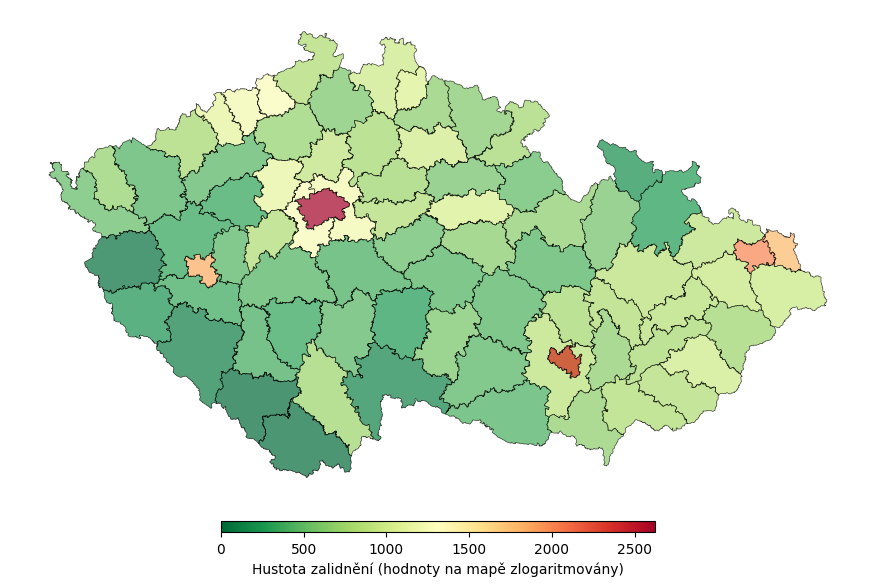

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import random
import pandas as pd

# Cesta ke složce s GeoJSON soubory
geojson_folder = "geojson_okresy"

# Načtení všech GeoJSON souborů ze složky
geojson_files = [os.path.join(geojson_folder, file) for file in os.listdir(geojson_folder) if file.endswith('.geojson')]

# Inicializace prázdného seznamu pro GeoDataFrames
gdfs = []
names = []

# Načtení každého GeoJSON souboru a jeho přidání do seznamu
for file in geojson_files:
    gdf = gpd.read_file(file)
    gdfs.append(gdf)
    # Extrakce názvu okresu z názvu souboru (bez cesty a přípony)
    name = os.path.splitext(os.path.basename(file))[0]
    names.append(name)

# Sloučení všech GeoDataFrames do jednoho
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Odstranění prázdných geometrií
combined_gdf = combined_gdf[combined_gdf.geometry.notnull()]

# Přidání názvů okresů do GeoDataFrame
combined_gdf['name'] = names

# Přidání sloupce s barvami do GeoDataFrame
combined_gdf['color'] = combined_gdf['name'].map(colors)

# Vykreslení mapy pomocí matplotlib
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

# Vykreslení každého okresu s jeho barvou
combined_gdf.plot(ax=ax, color=combined_gdf['color'], edgecolor='black', linewidth=0.5, alpha=0.7)

# Odebrání os z grafu
ax.set_axis_off()

# Přidání legendy ve formě barevné škály
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=mcolors.Normalize(vmin=0, vmax=2622))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.04, aspect=40, shrink=0.4)
cbar.set_label('Hustota zalidnění (hodnoty na mapě zlogaritmovány)')

# ax.text(0, 0, f'idk', va='center', fontdict={'weight': 'bold', 'size': 12})

# Uložení výsledku jako SVG
plt.savefig("mapa_okresu.svg", format="svg")

# Zobrazení grafu
plt.show()
